In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\DATATRAINED\Files-main\Files-main\Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()#finding the count the missing value

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

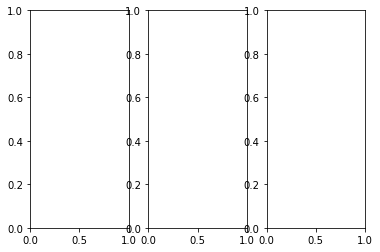

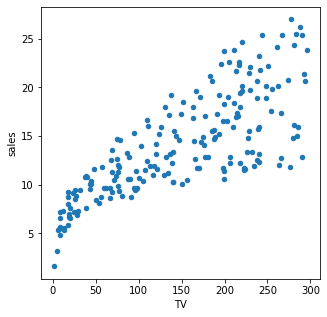

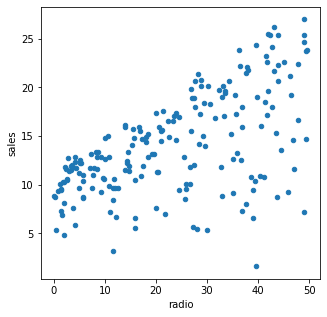

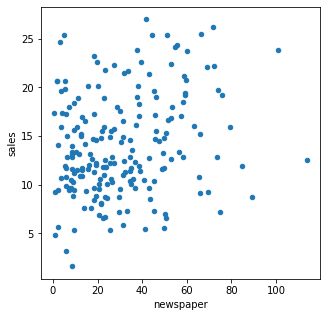

In [7]:
fig,asx=plt.subplots(1,3)
data.plot(kind='scatter', x='TV',y='sales',figsize=(5,5))
data.plot(kind='scatter', x='radio',y='sales',figsize=(5,5))
data.plot(kind='scatter', x='newspaper',y='sales',figsize=(5,5))

#fig.savefig('testdata.jpg')

In [8]:
x=data[['TV']]
y=data.sales

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x,y)

LinearRegression()

In [9]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [10]:
# y=mx+c
#c=intercept
#m=coefcent
#x=data

#if x=50 then prediction
7.032594+0.047537*50


9.409444

In [11]:
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [12]:
lm.predict(x_new)

array([9.40942557])

In [13]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [14]:
preds=lm.predict(x_new)

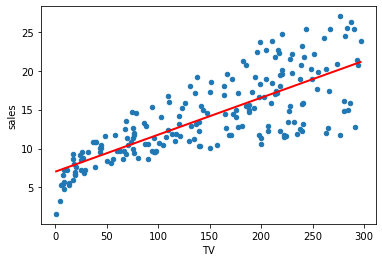

In [15]:
data.plot(kind='scatter',x='TV',y='sales')

plt.plot(x_new,preds, c='red' , linewidth=2)

In [16]:
import statsmodels.formula.api as smf

lm=smf.ols(formula='sales~TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [17]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [18]:
lm.rsquared

0.611875050850071

In [19]:
x=data[['TV','radio','newspaper']]
y=data.sales

lm=LinearRegression()
lm.fit(x,y)

print('Intercept : ->', lm.intercept_)
print('TV : ->', lm.coef_[0])
print('radio : ->', lm.coef_[1])
print('newspaper : ->', lm.coef_[2])

Intercept : -> 2.9388893694594085
TV : -> 0.045764645455397615
radio : -> 0.18853001691820448
newspaper : -> -0.0010374930424763007


In [20]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        07:36:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""